# In the name of God
### HW6
### Deep Q-Learning



**Name:** Amir Mohammad Babaei

**Std. No.:** 402212399


### Deep Q-Learning (DQN)

Deep Q-Learning is a popular algorithm in reinforcement learning that combines the ideas of Q-learning, a traditional reinforcement learning method, with deep neural networks. The goal is to train an agent to make decisions by estimating the optimal action-value function Q, which represents the expected cumulative future rewards for taking a particular action in a given state.

Key components of DQN:

- **Experience Replay:** To break the temporal correlation in sequential data and improve sample efficiency, we use an experience replay buffer to store and sample past experiences.
- **Target Networks:** The use of two separate networks, the main network and a target network, helps stabilize training by decoupling the update targets from the online network's constantly changing values.

### The Lunar Lander Problem

The task is to control a lunar lander and guide it to land safely on the moon's surface. The agent needs to learn a policy that takes into account the lunar lander's state (position, velocity, angle, angular velocity, etc.) and chooses appropriate actions (thrust left, thrust right, thrust up, or do nothing) to achieve a safe landing.

### Overview

- **Environment:** LunarLander-v2 from OpenAI Gym.
- **Objective:** Train an agent to learn a policy for landing the lunar lander safely.
- **Techniques:** Deep Q-Learning, Experience Replay, Target Networks.

### Instructions

1. Follow the instructions and comments in the code cells to implement and understand each component.
2. Replace the `#####TO DO#####` placeholders with your code.
3. Experiment with hyperparameters and observe how they affect the training process.
4. Run the notebook to train the agent and play the game with the trained model.
5. Answer any provided questions or tasks to reinforce your understanding.

### Prerequisites

Make sure you have the following libraries installed:


In [1]:
!pip install --upgrade setuptools wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
!pip install swig
!pip install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.5 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373080 sha256=e651c7ed2083ca820d2dea570a63f3a0b3040c06926d020e8c6da6d1df248b6e
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


# Imports

In [4]:
import numpy as np
import gym
import time
import torch
import torch.nn as nn
import torch.optim as optim
import os
import collections
import matplotlib.pyplot as plt
import collections
import random


env = gym.make('LunarLander-v2')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [10]:

class DQN(nn.Module):
    def __init__(self, in_features, n_actions):
        """
        Initialize the Deep Q-Network (DQN).

        Parameters:
        - in_features (int): Number of input features (dimension of the state).
        - n_actions (int): Number of possible actions in the environment.
        """
        super(DQN, self).__init__()

        # TODO: Implement the neural network architecture
        # Use Linear layers with ReLU
        # Number of hidden units in each layer:
        # - Layer 1: 256 units
        # - Layer 2: 128 units
        # - Layer 3: 64 units
        self.model = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, n_actions)
        )


    def forward(self, x):
        """
        Define the forward pass of the neural network.

        Parameters:
        - x (torch.Tensor): Input tensor representing the state.

        Returns:
        - torch.Tensor: Output tensor representing Q-values for each action.
        """
        # TODO: Implement the forward pass
        return self.model(x)


In [25]:
class ExperienceBuffer():
    def __init__(self, capacity):
        """
        Initialize the Experience Replay Buffer.

        Parameters:
        - capacity (int): Maximum capacity of the buffer.
        """
        self.exp_buffer = collections.deque(maxlen=capacity)

    def append(self, exp):
        """
        Append a new experience to the buffer.

        Parameters:
        - exp (tuple): Tuple representing a single experience (state, action, reward, done, next_state).
        """
        self.exp_buffer.append(exp)

    def __len__(self):
        """
        Get the current size of the buffer.

        Returns:
        - int: Number of experiences currently stored in the buffer.
        """
        return len(self.exp_buffer)

    def clear(self):
        """Clear all experiences from the buffer."""
        self.exp_buffer.clear()

    def sample(self, batch_size):
        """
        TODO: Sample a batch of experiences from the buffer.

        Parameters:
        - batch_size (int): Size of the batch to be sampled.

        Returns:
        - tuple: Batch of experiences (states, actions, rewards, dones, next_states).
        """
        # TODO: Implement the sampling logic


        # TODO: Convert to NumPy arrays with appropriate data types
        sample_batch = random.sample(self.exp_buffer, batch_size)
        states      = np.array([instance[0] for instance in sample_batch])
        actions     = np.array([instance[1] for instance in sample_batch])
        rewards     = np.array([instance[2] for instance in sample_batch], dtype=np.float32)
        dones       = np.array([instance[3] for instance in sample_batch], dtype=np.uint8)
        next_states = np.array([instance[4] for instance in sample_batch])
        return states, actions, rewards, dones, next_states


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
class Agent():
    def __init__(self, env, buffer):
        """
        Initialize the agent.

        Parameters:
        - env: The environment the agent interacts with.
        - buffer: Experience replay buffer to store agent experiences.
        """
        self.env = env
        self.buffer = buffer
        self._reset()

    def _reset(self):
        """
        Reset the agent's state and total rewards to the initial state.
        """
        self.state = env.reset()
        self.total_rewards = 0.0

    def step(self, net, eps, device="cpu"):
        """
        TODO: Implement the exploration-exploitation strategy (epsilon-greedy) here.

        Take a step in the environment using the provided neural network.

        Parameters:
        - net: The neural network representing the agent's policy.
        - eps (float): Epsilon value for epsilon-greedy exploration.
        - device (str): Device for neural network computations.

        Returns:
        - done_reward: Total rewards obtained in the episode if it is finished, otherwise None.
        """
        done_reward = None

        # TODO: Implement exploration-exploitation strategy here
        if np.random.random() < eps:
            # exploration
            action = env.action_space.sample()
        else:
            # exploitation
            state_prev = torch.tensor(self.state).to(device)
            action = int(torch.argmax(net(state_prev).to(device)))

        # TODO: Take the selected action for 4 time steps (adjustable)
        done = False
        state_prev = self.state
        for _ in range(4):
            self.state, reward, done, info = env.step(action)
            self.total_rewards += reward
            if done:
                break

        # TODO: Append the experience to the buffer
        self.buffer.append((state_prev, action, reward, done, self.state))
        if done:
            done_reward = self.total_rewards
            self._reset()

        return done_reward


In [27]:
# Hyperparameters
GAMMA = 0.99  # Discount factor for future rewards
EPSILON_START = 1.0  # Initial exploration probability (epsilon-greedy)
EPSILON_FINAL = 0.01  # Final exploration probability (epsilon-greedy)
EPSILON_DECAY_OBS = 10**5  # Number of observations for epsilon decay
BATCH_SIZE = 32  # Size of the experience replay batch
MEAN_GOAL_REWARD = 250  # Mean reward goal for solving the environment
REPLAY_BUFFER_SIZE = 10000  # Maximum capacity of the experience replay buffer
REPLAY_MIN_SIZE = 10000  # Minimum size of the experience replay buffer before training begins
LEARNING_RATE = 1e-4  # Learning rate for the neural network optimizer
SYNC_TARGET_OBS = 1000  # Number of observations before synchronizing target and online networks

In [30]:
import torch
import torch.nn as nn

def cal_loss(batch, net, tgt_net, device='cpu'):
    """
    TODO: Implement the loss calculation for Deep Q-Learning.

    Calculate the loss for Deep Q-Learning.

    Parameters:
    - batch (tuple): Batch of experiences (states, actions, rewards, dones, next_states).
    - net: The neural network representing the online Q-network.
    - tgt_net: The neural network representing the target Q-network.
    - device (str): Device for neural network computations (default is "cpu").

    Returns:
    - torch.Tensor: Loss value calculated using Mean Squared Error (MSE) loss.
    """

    states, actions, rewards, dones, next_states = batch
    states_v = torch.tensor(states).to(device)
    actions_v = torch.tensor(actions).to(device)
    rewards_v = torch.tensor(rewards).to(device)
    dones_v = torch.BoolTensor(dones).to(device)
    next_states_v = torch.tensor(next_states).to(device)

    # TODO: Calculate Q-values for the current states and selected actions
    Q_val = net(states_v).gather(1, actions_v.unsqueeze(-1)).squeeze(-1)

    # TODO: Calculate the maximum Q-value for the next states using the target network
    Q_val_next = tgt_net(next_states_v).max(1)[0]

    # TODO: Zero out Q-values for terminal states
    Q_val_next[dones_v] = 0.0

    # TODO: Detach Q-values for the next states to avoid gradient flow
    Q_val_next = Q_val_next.detach()

    # TODO: Calculate the expected return for the current states
    expected_return = rewards_v + GAMMA * Q_val_next

    # TODO: Implement the Mean Squared Error (MSE) loss calculation
    loss = nn.MSELoss()(Q_val, expected_return)

    return loss



# Learning Curves
 Plot learning curves showing key metrics (e.g., total rewards, loss) over the course of training. Analyze the trends and identify key points in the learning process.

GAME : 84523, TIME ECLAPSED : 1.3826909065246582, EPSILON : 0.15476999999999996, MEAN_REWARD : -61.191319711232275
Reward -63.836169201453096 -> -61.191319711232275 Model Saved
GAME : 85276, TIME ECLAPSED : 0.4211914539337158, EPSILON : 0.14724000000000004, MEAN_REWARD : -47.7969179931446
Reward -52.08736339851499 -> -47.7969179931446 Model Saved
GAME : 85568, TIME ECLAPSED : 0.40212535858154297, EPSILON : 0.14432, MEAN_REWARD : -39.01690578747093
Reward -41.79446345669103 -> -39.01690578747093 Model Saved
GAME : 86033, TIME ECLAPSED : 0.3099517822265625, EPSILON : 0.13966999999999996, MEAN_REWARD : -29.03843095625437
Reward -29.978769678847975 -> -29.03843095625437 Model Saved
GAME : 86523, TIME ECLAPSED : 0.26012444496154785, EPSILON : 0.13476999999999995, MEAN_REWARD : -17.624098201069742
Reward -19.117072359773978 -> -17.624098201069742 Model Saved
GAME : 86902, TIME ECLAPSED : 0.4002063274383545, EPSILON : 0.13097999999999999, MEAN_REWARD : -4.5524386956591885
Reward -8.4171265341

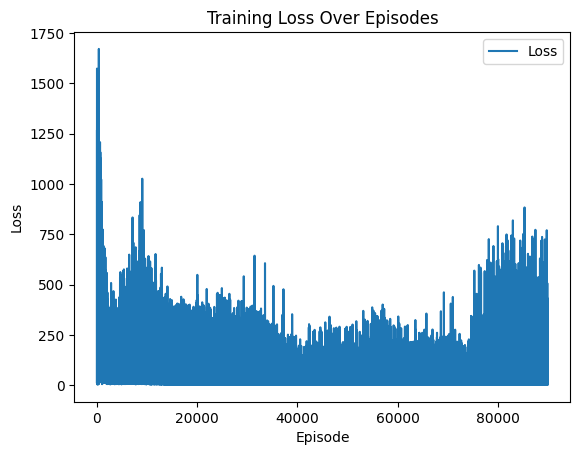

GAME : 100475, TIME ECLAPSED : 0.26540708541870117, EPSILON : 0.01, MEAN_REWARD : 228.1164960996626
Reward 227.84158373875664 -> 228.1164960996626 Model Saved
GAME : 102640, TIME ECLAPSED : 0.6473569869995117, EPSILON : 0.01, MEAN_REWARD : 241.90195466724978
Reward 241.54428420851778 -> 241.90195466724978 Model Saved
SOLVED in 103472 obs


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
tgt_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)

buffer = ExperienceBuffer(REPLAY_BUFFER_SIZE)

agent = Agent(env, buffer)

epsilon = EPSILON_START

optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

# Lists to track total rewards and losses over training
total_rewards = []
losses = []

# Initialize time variables for tracking training time
ts = time.time()
best_mean_reward = None
obs_id = 0

while True:
    obs_id += 1

    # Update exploration rate based on epsilon decay schedule
    epsilon = max(EPSILON_FINAL, EPSILON_START - obs_id/EPSILON_DECAY_OBS)

    # Agent takes a step in the environment, receives a reward
    reward = agent.step(net, epsilon, device=device)

    if reward is not None:
        # Store total rewards and update game time
        total_rewards.append(reward)
        game_time = time.time() - ts
        ts = time.time()
        mean_reward = np.mean(total_rewards[-100:])

        if best_mean_reward is None or best_mean_reward < mean_reward:
            torch.save(net.state_dict(), './lunar_lander-best.dat')

            if best_mean_reward is None:
                last = mean_reward
                best_mean_reward = mean_reward

            if best_mean_reward is not None and best_mean_reward - last > 10:
                last = best_mean_reward
                print("GAME : {}, TIME ECLAPSED : {}, EPSILON : {}, MEAN_REWARD : {}"
                      .format(obs_id, game_time, epsilon, mean_reward))
                print("Reward {} -> {} Model Saved".format(best_mean_reward, mean_reward))

            best_mean_reward = mean_reward

        if mean_reward > MEAN_GOAL_REWARD:
            print("SOLVED in {} obs".format(obs_id))
            break

    # Continue training if the replay buffer size is below the minimum required
    if len(buffer) < REPLAY_MIN_SIZE:
        continue

    # Synchronize target network with the Q-network at regular intervals
    if obs_id % SYNC_TARGET_OBS == 0:
        tgt_net.load_state_dict(net.state_dict())

    # TODO: Implement the training process (calculating loss, backpropagation, and optimizer step)
    optimizer.zero_grad()
    batch = buffer.sample(BATCH_SIZE)
    loss_t = cal_loss(batch, net, tgt_net, device=device)
    losses.append(loss_t.item())
    loss_t.backward()
    optimizer.step()

    # TODO: Plot learning curves every few episodes or steps
    if obs_id % 100000 == 0 and obs_id != 0:
        plt.plot(losses, label='Loss')
        plt.xlabel('Episode')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Episodes')
        plt.legend()
        plt.show()


# Visual Comparison:

write a function to render and display the environment before and after training. What visual differences do you observe in the agent's behavior? Discuss it. Also, Upload the Videos with your notebook. You can use the following library for rendering and saving videos.

In [33]:
import imageio

# Helper function for rendering and saving a video
def render_and_save_video(env, net, episodes=10, save_path="./render_video.mp4", device="cpu"):
    # TODO: Render and display the environment
    images = []  # List to store frames

    for episode in range(episodes):
        obs = env.reset()
        done = False

        while not done:
            # Render the current state
            frame = env.render(mode='rgb_array')
            images.append(frame)

            # Convert observation to tensor and move to the specified device
            obs = torch.FloatTensor(np.array([obs], dtype=np.float32)).to(device)

            # Choose the action using the trained network
            with torch.no_grad():
                action = net(obs).argmax(dim=1).item()

            # Take a step in the environment
            obs, _, done, _ = env.step(action)

    # Save the frames as a video
    imageio.mimsave(save_path, images)


# Render and save a video before training
print("### BEFORE TRAINING ###")
render_and_save_video(env, net, device=device,save_path = './before.mp4')

# Render and save a video after training
print("### AFTER TRAINING ###")
render_and_save_video(env, net, device=device,save_path = './after.mp4')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


### BEFORE TRAINING ###


### AFTER TRAINING ###


# Question:

Exploration (Epsilon-Greedy):

Discuss the significance of the exploration strategy, specifically the Epsilon-Greedy approach, in balancing exploration and exploitation during training.

## Answer
The Epsilon-Greedy approach is a strategy used in reinforcement learning to balance exploration and exploitation during training. This method helps the agent learn what to do by mapping situations to actions, maximizing rewards while also exploring new possibilities[1]. The key aspects of the Epsilon-Greedy approach include:

- **Exploration**: This involves trying new actions and learning about the environment to improve the agent's understanding of the best actions to take[1].

- **Exploitation**: This involves choosing the action with the highest estimated reward based on the agent's current knowledge[1].

- **Epsilon-Greedy Action Selection**: This method selects the action with the highest estimated reward most of the time, but with a small probability (epsilon), it chooses a random action independent of the action-value estimates[2]. The value of epsilon can be adjusted during the training process to fine-tune the exploration-exploitation tradeoff[5].

The Epsilon-Greedy approach helps the agent strike a balance between exploration and exploitation, allowing it to take advantage of prior knowledge while also exploring new possibilities[2]. This strategy enables the agent to learn more about the environment and improve its action-value estimates, leading to more informed decisions in the future[1]. By using the Epsilon-Greedy approach, the agent can avoid getting stuck in suboptimal states or missing out on better options due to a lack of exploration[2].

```
Citations:
[1] https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/
[2] https://www.baeldung.com/cs/epsilon-greedy-q-learning
[3] https://deeplizard.com/learn/video/mo96Nqlo1L8
[4] https://towardsdatascience.com/striking-a-balance-between-exploring-and-exploiting-5475d9c1e66e
[5] https://serp.ai/epsilon-greedy-exploration/
```